# Import Packages

In [1]:
# General Imports
import sys
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk

# Preprocessing Imports
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler

# Modeling Imports
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
import pickle

# Evaluation Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, roc_auc_score, roc_curve, auc

# Map src directory
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../."))
print("Root Directory: ", root_dir)
src_dir = os.path.join(root_dir,"src")
print("Src Directory: ", src_dir)
sys.path.append(src_dir)
data_dir = os.path.join(root_dir,"data")
print("Data Directory: ", data_dir)
models_dir = os.path.join(root_dir,"models")
print("Models Directory: ", models_dir)

# Import project modules
sys.path.append('../src/complete_collision_recorder/')
import complete_collision as cc
import utils as u

Root Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder
Src Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src
Data Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/data
Models Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/models


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
venv_nltk_data_path = os.path.join(root_dir,'.venv/lib/nltk_data')
print("venv Data Path: ",venv_nltk_data_path)

try:
    os.mkdir(venv_nltk_data_path)
    try:
        nltk.download('words', download_dir=venv_nltk_data_path)
        nltk.download('punkt_tab', download_dir=venv_nltk_data_path) # use punkt_tab instead of punkt to avoid pickling security vulnerability
        nltk.download('stopwords',download_dir=venv_nltk_data_path)
        nltk.data.path.clear()
        nltk.data.path.append(venv_nltk_data_path)
    except:
        print("Error: Unable to download words")
except:
    print("Unable to create directory - it might already exist")
    pass


venv Data Path:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/nltk_data
Unable to create directory - it might already exist


In [3]:
training_df = pd.read_csv(os.path.join(data_dir, "processed", "training_df.csv"))
training_df['concatenated_text'] = training_df.apply(u.concatenate_texts, axis=1)

In [4]:
models = [
    ('LinearSVC', LinearSVC()), 
    ('RF', RandomForestClassifier(n_estimators=100))
]

class_balancers = [
    None,
    RandomOverSampler(random_state=123), 
    SMOTE(random_state=123), 
    ADASYN(random_state=123), 
    SVMSMOTE(random_state=123)
]

/tmp/ipykernel_2506486/1183479050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_df['CRASH_SEVERE_IND'] = training_df['CRASH_SEVERITY_CD'].apply(


Dataset has been split into training and testing sets.
Number of rows in total: 569
Number of rows in X_train: 455
Number of rows in X_test: 114
Number of Features/Terms in vector): 296
Min value: 0.0
Max value: 0.7329291137889778
Percentiles: [0.        0.        0.        0.1359964]
Explained Variance: 95.14%
Number of Components:  175
Explained Variance: 95.04%


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/notebooks/../src/complete_collision_recorder/complete_collision.py:1168: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balancer_eval = pd.concat(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: Undefi

,Model,Balancer,Confusion Matrix,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,LinearSVC,None,"[[87, 4], [17, 6]]",0.718269,0.608457,0.627972
1,RF,None,"[[91, 0], [21, 2]]",0.906250,0.543478,0.528276
2,LinearSVC,RandomOverSampler(random_state=123),"[[77, 14], [11, 12]]",0.668269,0.683946,0.675066
3,RF,RandomOverSampler(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902
4,LinearSVC,SMOTE(random_state=123),"[[80, 11], [13, 10]]",0.668203,0.656952,0.662055
5,RF,SMOTE(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902
6,LinearSVC,ADASYN(random_state=123),"[[77, 14], [12, 11]]",0.652584,0.662207,0.656944
7,RF,ADASYN(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902
8,LinearSVC,SVMSMOTE(random_state=123),"[[81, 10], [12, 11]]",0.697389,0.684185,0.690217
9,RF,SVMSMOTE(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902


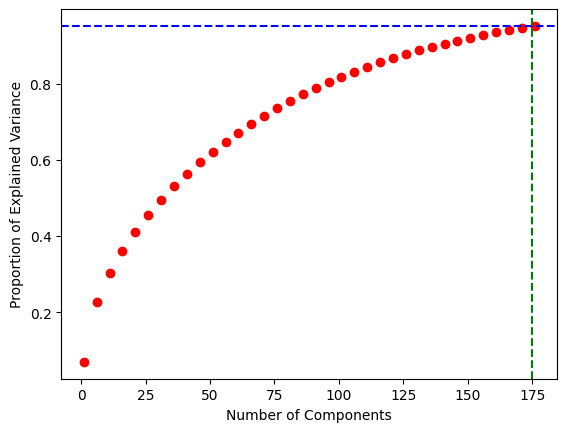

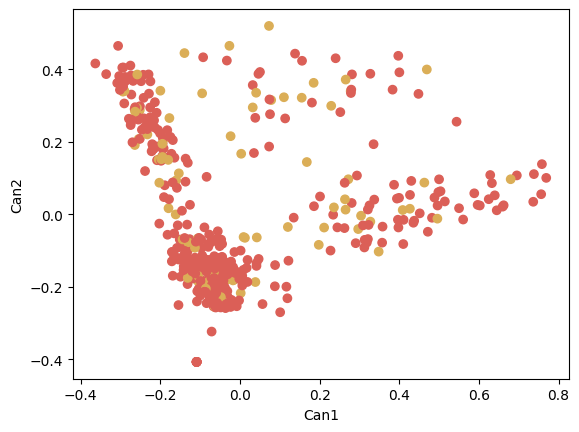

In [5]:
severity_df = training_df[training_df['CRASH_SEVERITY_CD'].notnull() & training_df['CRASH_SEVERITY_CD'] !=0]
severity_df['CRASH_SEVERE_IND'] = training_df['CRASH_SEVERITY_CD'].apply(
    lambda x: 1 if x in [1, 2] else 0
)
preprocess_severity = cc.PreprocessGCAT(df=severity_df, 
                                               text_column='concatenated_text', 
                                               label_column='CRASH_SEVERE_IND',
                                               test_size=0.2, 
                                               norm = 'l2', 
                                               vocabulary=None, 
                                               min_df=0.05, 
                                               max_df=0.9, 
                                               max_features=500
                                               ) 
preprocess_severity.fit_and_evaluate_tfidf_vector()
dtm = preprocess_severity.create_doc_term_matrix()
explained_variance, components = preprocess_severity.pca_analysis(dtm)
balancer_eval_severity = preprocess_severity.evaluate_balancers(models, class_balancers, n_components=components)
balancer_eval_severity

In [6]:
pipe_severity = Pipeline([
    ('vec', preprocess_severity.vec),
    ('pca', PCA(n_components=components)), 
    ('classifier', LinearSVC(random_state=123))
])

parameters = [
    {
        'pca__whiten': [False],
        'classifier__C': [0.1, 1, 5, 10, 25, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
        'classifier__dual': [True, False],
        'classifier__max_iter': [1000, 5000, 10000]
    }
]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search_severity = GridSearchCV(pipe_severity, parameters, cv=kf, scoring='f1', verbose=1)
grid_search_severity.fit(preprocess_severity.X_train, preprocess_severity.y_train)

print("Best parameters:", grid_search_severity.best_params_)
print("Best cross-validation score:", grid_search_severity.best_score_)
severity_best = grid_search_severity.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Rec

Best parameters: {'classifier__C': 25, 'classifier__dual': True, 'classifier__loss': 'squared_hinge', 'classifier__max_iter': 1000, 'pca__whiten': False}
Best cross-validation score: 0.4612624699002409


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Injury Severity Label Validation
F1 score:  0.7817123453795781
ROC AUC score:  0.6407071189679885
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        91
           1       0.47      0.39      0.43        23

    accuracy                           0.79       114
   macro avg       0.66      0.64      0.65       114
weighted avg       0.78      0.79      0.78       114



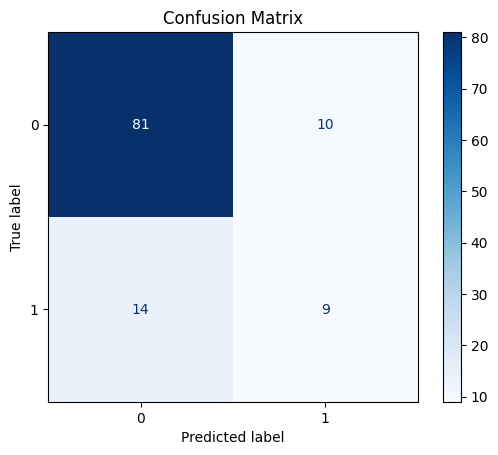

In [7]:
print("Injury Severity Label Validation")
u.evaluate_confusion_matrix(preprocess_severity.y_test, severity_best, preprocess_severity.X_test)

In [13]:
with open(os.path.join(models_dir, 'severity.pkl'), 'wb') as f:
    pickle.dump(severity_best, f)
print("Severity Model Saved to models directory as severity.pkl")

Severity Model Saved to models directory as severity.pkl
